Data Import

In [116]:
import requests
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import scipy.stats as st
import seaborn as sns

In [117]:
conversion_data = pd.read_csv('KAG_conversion_data.csv')   
conversion_data.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


In [118]:
# checking for types/irregularities 
conversion_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [119]:
# there are as many ad ids as observations and can therefore be dropped. Did the same fore FB campaign ids
conversion_data.drop(['ad_id'], axis = 1, inplace = True)
conversion_data.drop(['fb_campaign_id'], axis = 1, inplace = True)
conversion_data

,xyz_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,916,30-34,M,15,7350,1,1.430000,2,1
1,916,30-34,M,16,17861,2,1.820000,2,0
2,916,30-34,M,20,693,0,0.000000,1,0
3,916,30-34,M,28,4259,1,1.250000,1,0
4,916,30-34,M,28,4133,1,1.290000,1,1
...,...,...,...,...,...,...,...,...,...
1138,1178,45-49,F,109,1129773,252,358.189997,13,2
1139,1178,45-49,F,110,637549,120,173.880003,3,0
1140,1178,45-49,F,111,151531,28,40.289999,2,0
1141,1178,45-49,F,113,790253,135,198.710001,8,2


In [120]:
spent = conversion_data['Spent'].sum()
round(spent)

58705

In [121]:
Impressions = conversion_data['Impressions'].sum()
Impressions

213434828

Campaign Advertisment Plot

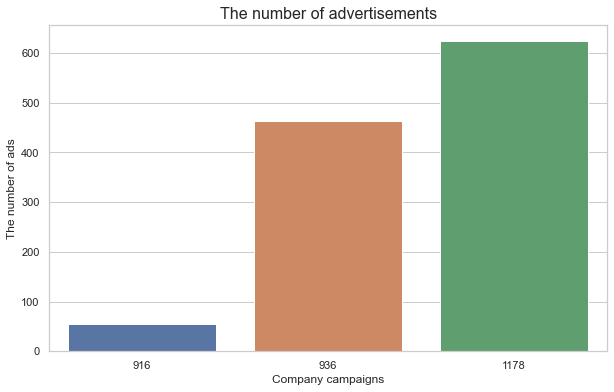

In [54]:
# count the campaign
fig=plt.figure(figsize=(10,6))
sns.countplot(x ='xyz_campaign_id', data = conversion_data)
plt.xlabel('Company campaigns')
plt.ylabel('The number of ads')
plt.title('The number of advertisements', fontsize=16)
plt.savefig("kag_images/campaigncount_final.png")
plt.show()

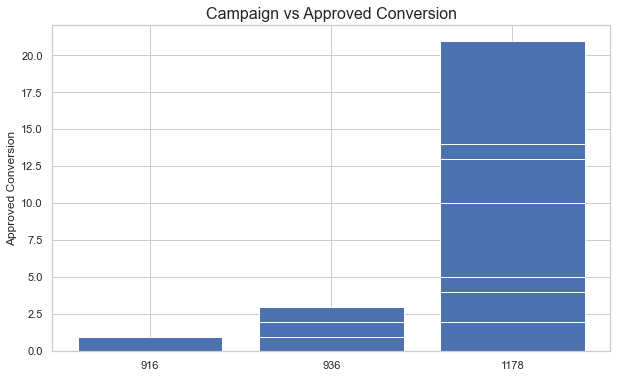

In [57]:
#Approved_Conversion
fig=plt.figure(figsize=(10,6))
plt.bar(conversion_data["xyz_campaign_id"].astype(str), conversion_data["Approved_Conversion"])
plt.ylabel("Approved Conversion")
plt.title("Campaign vs Approved Conversion", fontsize=16)
plt.savefig("kag_images/campaign_bar_final.png")
plt.show()

From the graph we can see that campaign 1178 has the highest approved conversions which means people are mostly buying things though this campign

Gender

In [58]:
gender = conversion_data['gender'].value_counts()
gender

M    592
F    551
Name: gender, dtype: int64

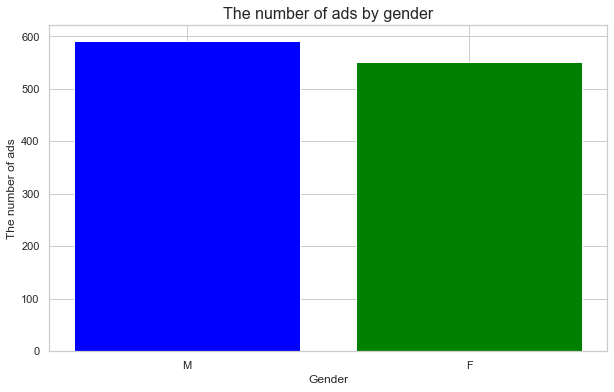

In [60]:
fig=plt.figure(figsize=(10,6))
gender = conversion_data['gender'].value_counts()
plt.bar(gender.index.values,gender.values,  color=['blue','green'])
plt.xlabel('Gender')
plt.ylabel('The number of ads')
plt.title('The number of ads by gender', fontsize=16)
plt.savefig("kag_images/gender_bar_final.png")
plt.show();

Age

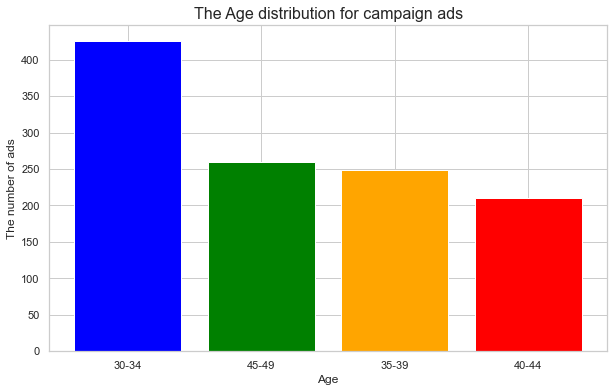

In [62]:
fig=plt.figure(figsize=(10,6))
ages = conversion_data['age'].value_counts()
plt.bar(ages.index.values,ages.values, color=['blue','green','orange','red'])
plt.xlabel('Age')
plt.ylabel('The number of ads')
plt.title('The Age distribution for campaign ads', fontsize=16)
plt.savefig("kag_images/age dis of campaign_final.png")
plt.show()

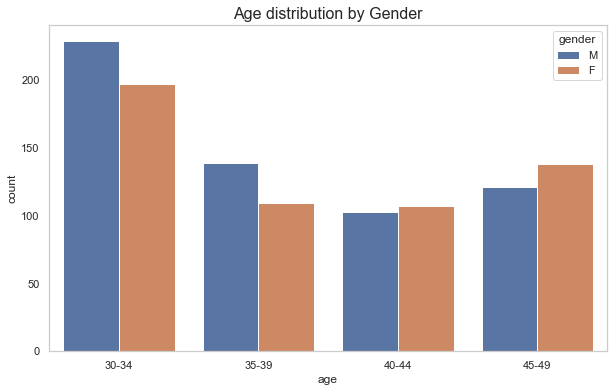

In [63]:
fig=plt.figure(figsize=(10,6))
sns.countplot(data=conversion_data, x='age', hue='gender')
plt.title('Age distribution by Gender', fontsize=16)
plt.grid(axis='y')
plt.savefig("kag_images/age by gender_final.png")

Based on both graphs both genders have the same intrest but people in the age range 30-34 show the most intrest in the ad campaigns

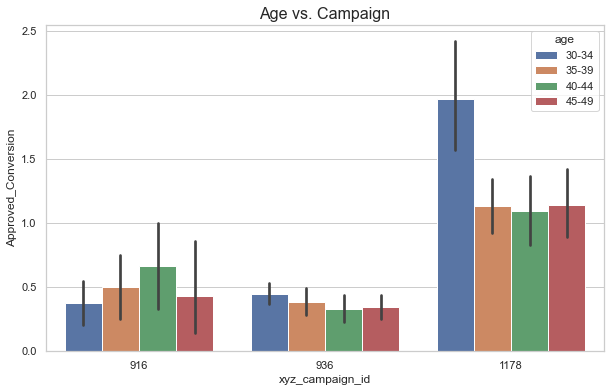

In [65]:
fig=plt.figure(figsize=(10,6))
sns.set(style="whitegrid")
tips = sns.load_dataset("tips")
sns.barplot(x=conversion_data["xyz_campaign_id"], y=conversion_data["Approved_Conversion"], hue=conversion_data["age"], data=tips)
plt.title('Age vs. Campaign', fontsize=16)
plt.savefig("kag_images/age vs campaign_final.png")

Campaign Ads - Interests

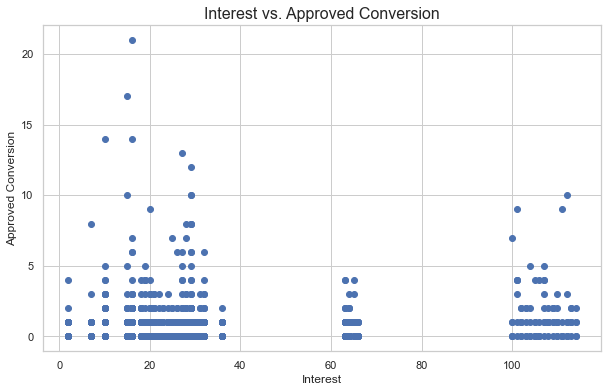

In [66]:
fig=plt.figure(figsize=(10,6))
plt.scatter(conversion_data["interest"], conversion_data["Approved_Conversion"])
plt.title("Interest vs. Approved Conversion", fontsize=16)
plt.xlabel("Interest")
plt.ylabel("Approved Conversion")
plt.savefig("kag_images/Interest vs. Approved_final.png")
plt.show()

<Figure size 720x432 with 0 Axes>

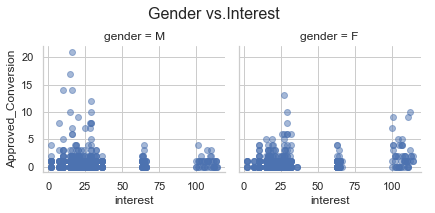

In [99]:
fig=plt.figure(figsize=(10,6))
c = sns.FacetGrid(conversion_data,  col="gender" )
c.map(plt.scatter, "interest", "Approved_Conversion", alpha=.5)
c.fig.subplots_adjust(top=.8)
c.fig.suptitle("Gender vs.Interest", fontsize=16)
c.add_legend()
plt.savefig("kag_images/age interest approved_final.png")

In the plots above, men tend to click more than women but women buy more products than men after clicking the add.

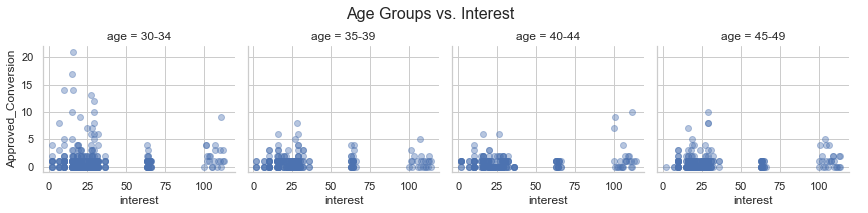

In [77]:
g = sns.FacetGrid(conversion_data, col="age")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.fig.subplots_adjust(top=.8)
g.fig.suptitle("Age Groups vs. Interest", fontsize=16)
g.add_legend()
plt.savefig("kag_images/Age Groups vs. Intrest_final.png")

In different age groups, it seems like people in age group 30-34 has more tendency to buy product after clicking the add.

After inquiring the product

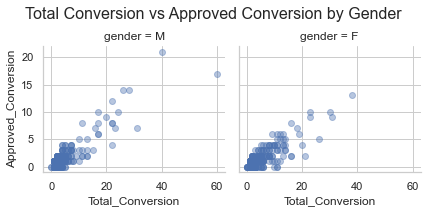

In [93]:
g = sns.FacetGrid(conversion_data, col="gender")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion", alpha=.4)
g.fig.subplots_adjust(top=.8)
g.fig.suptitle("Total Conversion vs Approved Conversion by Gender", fontsize=16)
g.add_legend()
plt.savefig("kag_images/Total Conversion vs Approved Conversion_final.png")

From these 2 graphs, we can see that women buy more products than men after enquiring the product. However, men tends to enquire more about the product.

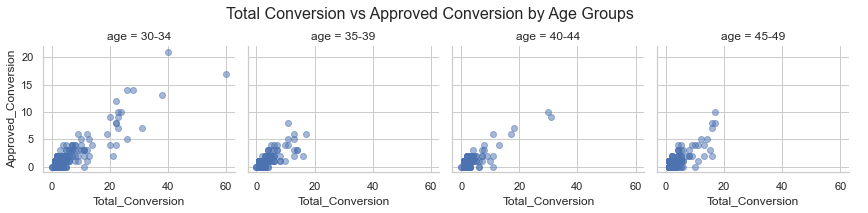

In [97]:
g = sns.FacetGrid(conversion_data, col="age")
g.map(plt.scatter, "Total_Conversion", "Approved_Conversion",alpha=.5)
g.fig.subplots_adjust(top=.8)
g.fig.suptitle("Total Conversion vs Approved Conversion by Age Groups", fontsize=16)
g.add_legend()
plt.savefig("kag_images/Total Conversion vs Approved Conversion Age_final.png")

People in age group 30-34 are more likely to buy the product after enquiring the product.

In [78]:
# total number of clicks
clicks = conversion_data['Clicks'].sum()
clicks

38165

In [79]:
#Total_Conversion
Total_Conversion = conversion_data['Total_Conversion'].sum()
Total_Conversion

3264

Money Spent

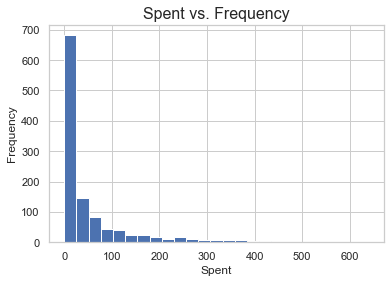

In [81]:
#spent vs frequency 
plt.hist(conversion_data['Spent'], bins = 25)
plt.title("Spent vs. Frequency", fontsize=16)
plt.xlabel("Spent")
plt.ylabel("Frequency")
plt.savefig("kag_images/Spent vs Frequency_final.png")
plt.show()

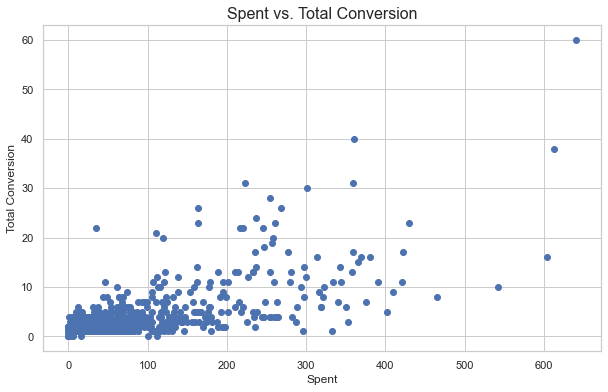

In [82]:
#spent vs total conversion 
fig=plt.figure(figsize=(10,6))
plt.scatter(conversion_data["Spent"], conversion_data["Total_Conversion"])
plt.title("Spent vs. Total Conversion", fontsize=16)
plt.xlabel("Spent")
plt.ylabel("Total Conversion")
plt.savefig("kag_images/spent vs total_final.png")
plt.show()

In [83]:
#Approved_Conversion
Approved_Conversion = conversion_data['Approved_Conversion'].sum()
Approved_Conversion

1079

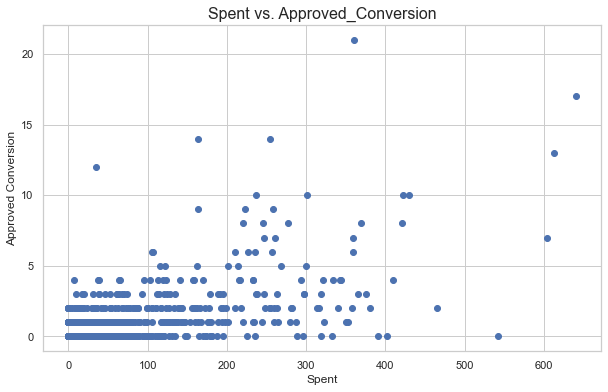

In [84]:
#spent vs approved 
fig=plt.figure(figsize=(10,6))
plt.scatter(conversion_data["Spent"], conversion_data["Approved_Conversion"])
plt.title("Spent vs. Approved_Conversion", fontsize=16)
plt.xlabel("Spent")
plt.ylabel("Approved Conversion")
plt.savefig("kag_images/spent vs approved_final.png")
plt.show()

Impressions

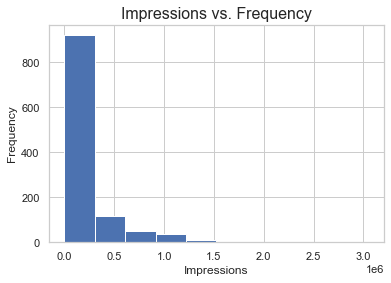

In [87]:
plt.hist(conversion_data['Impressions'])
plt.title("Impressions vs. Frequency", fontsize=16)
plt.xlabel("Impressions")
plt.ylabel("Frequency")
plt.savefig("kag_images/impressions vs frequency.png")
plt.show()

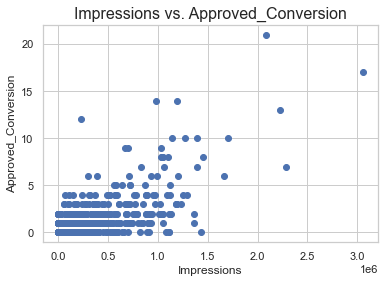

In [129]:
plt.scatter(conversion_data["Impressions"], conversion_data["Approved_Conversion"])
plt.title("Impressions vs. Approved_Conversion", fontsize=16)
plt.xlabel("Impressions")
plt.ylabel("Approved_Conversion")
plt.savefig("kag_images/Impressions vs approved_final.png")
plt.show()

In the 2 plots above, you can see that there is a rise in approved conversions after a ceratin point of impressions.

Impressions vs. Clicks

In [130]:
conversion_data[['Impressions', 'Clicks']].corr()

,Impressions,Clicks
Impressions,1.000000,0.948514
Clicks,0.948514,1.000000


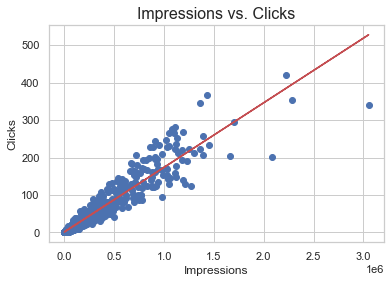

In [132]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(conversion_data["Impressions"],conversion_data["Clicks"])
regress_values = conversion_data["Impressions"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(conversion_data["Impressions"], conversion_data["Clicks"])
plt.plot(conversion_data["Impressions"],regress_values,"r-")
#plt.annotate(line_eq,(20,36),fontsize=16,color="red")
plt.title("Impressions vs. Clicks", fontsize=16)
plt.xlabel("Impressions")
plt.ylabel("Clicks")
plt.savefig("kag_images/Impressions vs Clicks_final.png")
plt.show()

The more a campaign displayed the more users will click on the ads. There is also a positive linear relationship.

Spent vs Clicks

In [133]:
conversion_data[['Spent', 'Clicks']].corr()

,Spent,Clicks
Spent,1.000000,0.992906
Clicks,0.992906,1.000000


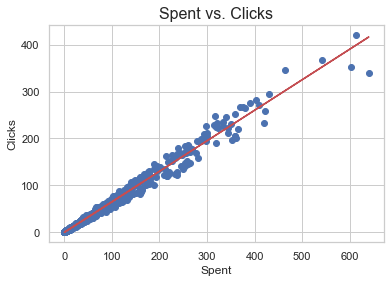

In [134]:
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(conversion_data["Spent"],conversion_data["Clicks"])
regress_values = conversion_data["Spent"] * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(conversion_data["Spent"], conversion_data["Clicks"])
plt.plot(conversion_data["Spent"],regress_values,"r-")
#plt.annotate(line_eq,(20,36),fontsize=16,color="red")
plt.title("Spent vs. Clicks", fontsize=16)
plt.xlabel("Spent")
plt.ylabel("Clicks")
plt.savefig("kag_images/Spent vs Clicks_final.png")
plt.show()

There is a positive linear relationship between Spent and Click Through Rate.